<center> <h1> <b> AIET Tutorial </b> </h1> </center>

<b> AIET Tutorial on GMM and Latent variable models </b>

Welcome to the tutorial on Sequence models, RNNs and LSTMs. This tutorial is broadly classified into three parts.





<h4> <b> A. Dynamic Time Warping(DTW): </b>  In this part we will try and implement the basic sequence matching algorithm DTW. </h4>

[link to data](https://drive.google.com/drive/folders/1tcH4WottF25iwxu06WyBFUUIgcGAP__V?usp=sharing)

<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>


#### <b> Toy Example </b>
<center> $A = [4,3,7,0,2,6,5] \\ B = [3,7,1,6,1,5,4,4]$</center>

[(6, 7), (6, 6), (5, 5), (4, 4), (3, 4), (2, 3), (1, 2), (0, 1), (0, 0)]


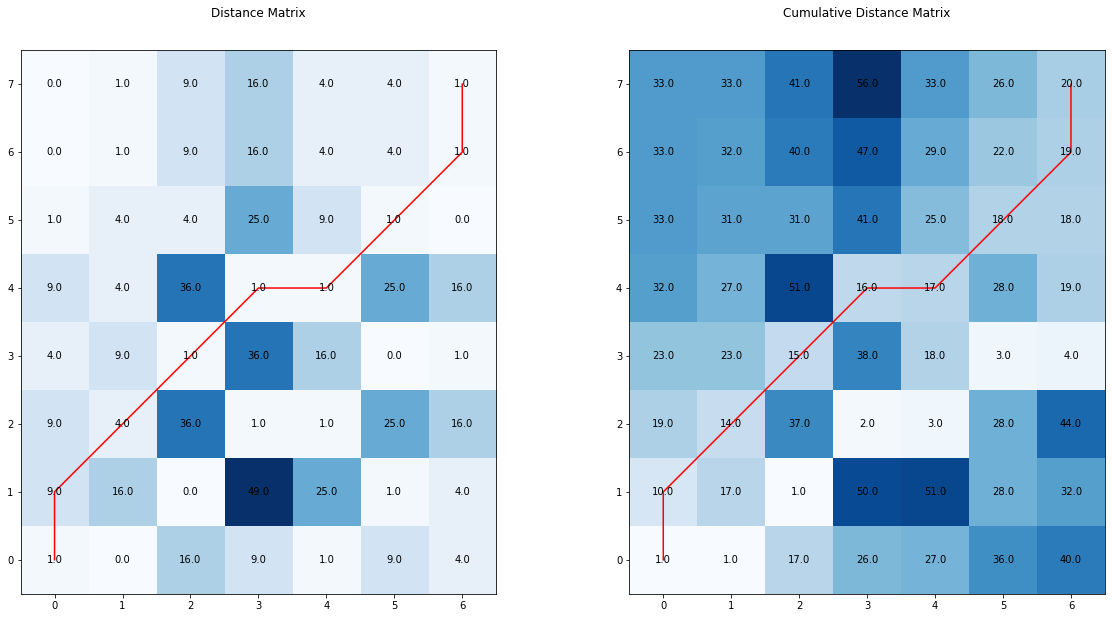

0

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def DTW(template1,template2):
    DTW_distance_Matrix = np.zeros((len(template1), len(template2)))
    DTW_cumulate_Matrix =  np.zeros((len(template1), len(template2)))  # cummulative distance matrix
    P = []
    for i in range(len(template1)): #you can start from 1
        p = []
        for j in range(len(template2)):
            current_distance = (template1[i]-template2[j])**2     # Compute the euclidean distance between the current feature vectors
            DTW_distance_Matrix[i,j] = current_distance
            v = {}
            if i-1>=0 and j-1>=0:
                v[(i-1, j-1)] = DTW_cumulate_Matrix[i-1, j-1]
            if i-1>=0:
                v[(i-1,j)] = DTW_cumulate_Matrix[i-1,j]
            if j-1>=0:
                v[(i,j-1)] = DTW_cumulate_Matrix[i,j-1]
            if len(v) == 0:
                v[(-1,-1)] = 0
            DTW_cumulate_Matrix[i,j] = current_distance + min(v.values())
            p.append(min(v, key=v.get))
        P.append(p)
    opt_distance = DTW_cumulate_Matrix[-1,-1]
    OptPath = []
    OptPath.append((len(template1)-1, len(template2)-1))
    while True:
      i,j = OptPath[-1]
      if i==-1 and j==-1: break
      OptPath.append(P[i][j])
    return DTW_distance_Matrix, DTW_cumulate_Matrix, opt_distance, OptPath[:-1]

def plotDTWpath(template1,template2):
    D, C, OptDistance, OptPath = DTW(template1, template2)
    print(OptPath)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    D = D.T
    C = C.T
    ax1.matshow(D, cmap=plt.cm.Blues, origin='lower')
    ax2.matshow(C, cmap=plt.cm.Blues, origin='lower')
    for i in range(C.shape[1]):
        for j in range(C.shape[0]):
            d = D[j,i]
            c = C[j,i]
            ax1.text(i, j, str(d), va='center', ha='center')
            ax2.text(i, j, str(c), va='center', ha='center')
    xx = [i for i,j in OptPath]
    yy = [j for i,j in OptPath]
    ax1.plot(xx,yy,'red')
    ax2.plot(xx,yy,'red')
    ax1.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_ticks_position('bottom')
    ax1.set_title('Distance Matrix')
    ax2.set_title('Cumulative Distance Matrix')
    plt.show()
    return 0

a = [4,3,7,0,2,6,5]
b = [3,7,1,6,1,5,4,4]
plotDTWpath(a,b)

#### <b> Digit recignition using DTW </b>

[link to data](https://drive.google.com/drive/folders/1L7vENw_35b-FSqDZ1eer3MxxzraKMXgM?usp=sharing)



In [ ]:
!pip install speechpy
!pip install python_speech_features

import scipy.io.wavfile as wav
import speechpy
from python_speech_features import mfcc

def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600//2,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
import soundfile as sf

drive.mount('/content/drive')
bacground_data_location='/content/drive/MyDrive/TalentSprint/Session2/MultiSpeakerDigitData/MultiSpeakerDigitData/' #Change this location
bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             bacground_data_files.append(os.path.join(root, file))
bacground_data_files = np.array(bacground_data_files)

def VectorDTW(template1,template2):
    DTW_distance_Matrix = np.zeros((len(template1), len(template2)))
    DTW_cumulate_Matrix =  np.zeros((len(template1), len(template2)))  # cummulative distance matrix
    P = []
    for i in range(len(template1)): #you can start from 1
        p = []
        for j in range(len(template2)):
            current_distance = np.linalg.norm(template1[i]-template2[j],2)     # Compute the euclidean distance between the current feature vectors
            DTW_distance_Matrix[i,j] = current_distance
            v = {}
            if i-1>=0 and j-1>=0:
                v[(i-1, j-1)] = DTW_cumulate_Matrix[i-1, j-1]
            if i-1>=0:
                v[(i-1,j)] = DTW_cumulate_Matrix[i-1,j]
            if j-1>=0:
                v[(i,j-1)] = DTW_cumulate_Matrix[i,j-1]
            if len(v) == 0:
                v[(-1,-1)] = 0
            DTW_cumulate_Matrix[i,j] = current_distance + min(v.values())
            p.append(min(v, key=v.get))
        P.append(p)
    opt_distance = DTW_cumulate_Matrix[-1,-1]
    OptPath = []
    OptPath.append((len(template1)-1, len(template2)-1))
    while True:
      i,j = OptPath[-1]
      if i==-1 and j==-1: break
      OptPath.append(P[i][j])
    return DTW_distance_Matrix, DTW_cumulate_Matrix, opt_distance, OptPath[:-1]

comparison_template_files = ['0_jackson_1.wav','1_jackson_1.wav','2_jackson_1.wav','3_jackson_1.wav','4_jackson_1.wav','5_jackson_1.wav','6_jackson_1.wav','7_jackson_1.wav','8_jackson_1.wav','9_jackson_1.wav']
cmatrix = np.zeros((10,10))
true_outputs = []
predictions = []
for test_teamples_file in bacground_data_files:
  template1 = MFCC(test_teamples_file)
  true_digit = int(test_teamples_file.split('/')[-1].split('_')[0])
  true_outputs.append(true_digit)
  distances = []
  for comparison_template_file_ in comparison_template_files:
    comparison_template_file = bacground_data_location + comparison_template_file_
    template2 = MFCC(comparison_template_file)
    _,_,dist,_ = VectorDTW(template1, template2)
    distances.append(dist)
  pred_digit = np.argmin(distances)
  predictions.append(pred_digit)
  cmatrix[true_digit, pred_digit] +=1
true_outputs = np.array(true_outputs)
predictions = np.array(predictions)
print('\nAccuracy:', (len(true_outputs[true_outputs==predictions])/len(true_outputs))*100,'%')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Experiment with the pair of signals from the Same Speaker

import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
import soundfile as sf

drive.mount('/content/drive')
bacground_data_location='/content/drive/MyDrive/TalentSprint/Session2/MultiSpeakerDigitData/MultiSpeakerDigitData/' #Change this location
bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             bacground_data_files.append(os.path.join(root, file))
bacground_data_files = np.array(bacground_data_files)

def VectorDTW(template1,template2):
    DTW_distance_Matrix = np.zeros((len(template1), len(template2)))
    DTW_cumulate_Matrix =  np.zeros((len(template1), len(template2)))  # cummulative distance matrix
    P = []
    for i in range(len(template1)): #you can start from 1
        p = []
        for j in range(len(template2)):
            current_distance = np.linalg.norm(template1[i]-template2[j],2)     # Compute the euclidean distance between the current feature vectors
            DTW_distance_Matrix[i,j] = current_distance
            v = {}
            if i-1>=0 and j-1>=0:
                v[(i-1, j-1)] = DTW_cumulate_Matrix[i-1, j-1]
            if i-1>=0:
                v[(i-1,j)] = DTW_cumulate_Matrix[i-1,j]
            if j-1>=0:
                v[(i,j-1)] = DTW_cumulate_Matrix[i,j-1]
            if len(v) == 0:
                v[(-1,-1)] = 0
            DTW_cumulate_Matrix[i,j] = current_distance + min(v.values())
            p.append(min(v, key=v.get))
        P.append(p)
    opt_distance = DTW_cumulate_Matrix[-1,-1]
    OptPath = []
    OptPath.append((len(template1)-1, len(template2)-1))
    while True:
      i,j = OptPath[-1]
      if i==-1 and j==-1: break
      OptPath.append(P[i][j])
    return DTW_distance_Matrix, DTW_cumulate_Matrix, opt_distance, OptPath[:-1]

comparison_template_files = ['0_jackson_1.wav','1_jackson_1.wav','2_jackson_1.wav','3_jackson_1.wav','4_jackson_1.wav','5_jackson_1.wav','6_jackson_1.wav','7_jackson_1.wav','8_jackson_1.wav','9_jackson_1.wav']
cmatrix = np.zeros((10,10))
true_outputs = []
predictions = []
for test_template_file in bacground_data_files:
  speaker = test_template_file.split('/')[-1].split('_')[1]
  if speaker=='jackson':
    template1 = MFCC(test_template_file)
    true_digit = int(test_template_file.split('/')[-1].split('_')[0])
    true_outputs.append(true_digit)
    distances = []
    for comparison_template_file_ in comparison_template_files:
      comparison_template_file = bacground_data_location + comparison_template_file_
      template2 = MFCC(comparison_template_file)
      _,_,dist,_ = VectorDTW(template1, template2)
      distances.append(dist)
    pred_digit = np.argmin(distances)
    predictions.append(pred_digit)
    cmatrix[true_digit, pred_digit] +=1
true_outputs = np.array(true_outputs)
predictions = np.array(predictions)
print('\nAccuracy:', (len(true_outputs[true_outputs==predictions])/len(true_outputs))*100,'%')
print('\n\n Confusion Matrix:\n', cmatrix, '\n\n')

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cmatrix.shape[0]):
    for j in range(cmatrix.shape[1]):
        ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='xx-large')

ax.set_xlabel('Predictions', fontsize=18)
ax.xaxis.set_label_position('top')
ax.set_ylabel('True Labels', fontsize=18)
plt.show()

In [ ]:
# Experiment with the pair of signals from the Different Speaker

comparison_template_files = ['0_jackson_1.wav','1_jackson_1.wav','2_jackson_1.wav','3_jackson_1.wav','4_jackson_1.wav','5_jackson_1.wav','6_jackson_1.wav','7_jackson_1.wav','8_jackson_1.wav','9_jackson_1.wav']
cmatrix = np.zeros((10,10))
true_outputs = []
predictions = []
for test_template_file in bacground_data_files:
  speaker = test_template_file.split('/')[-1].split('_')[1]
  if speaker=='nicolas':
    template1 = MFCC(test_template_file)
    true_digit = int(test_template_file.split('/')[-1].split('_')[0])
    true_outputs.append(true_digit)
    distances = []
    for comparison_template_file_ in comparison_template_files:
      comparison_template_file = bacground_data_location + comparison_template_file_
      template2 = MFCC(comparison_template_file)
      _,_,dist,_ = VectorDTW(template1, template2)
      distances.append(dist)
    pred_digit = np.argmin(distances)
    predictions.append(pred_digit)
    cmatrix[true_digit, pred_digit] +=1
true_outputs = np.array(true_outputs)
predictions = np.array(predictions)
print('\nAccuracy:', (len(true_outputs[true_outputs==predictions])/len(true_outputs))*100,'%')
print('\n\n Confusion Matrix:\n', cmatrix, '\n\n')

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cmatrix.shape[0]):
    for j in range(cmatrix.shape[1]):
        ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='xx-large')

ax.set_xlabel('Predictions', fontsize=18)
ax.xaxis.set_label_position('top')
ax.set_ylabel('True Labels', fontsize=18)
plt.show()

##### Drawbacks of DTW
1. The DTW do not account for statistical variations
2. Channel and normalization effects
3. Speaker dependence

<h4> <b> B. Isolated Digit Recognition using LSTM : </b>  This part describes the steps involved in recognizing the digits using neural networks comprising of LSTM layers. </h4>

[link to data](https://drive.google.com/drive/folders/1tcH4WottF25iwxu06WyBFUUIgcGAP__V?usp=sharing)


<dt> <h4>  1. Training  </h4> </dt>
<dd> <h4>  - Dataset   </h4> </dd>

<dd> <h4>  <dd> <h4> - Can we infer the properites of data from DTW experimetns ?  </h4> </dd> </h4> </dd>
<dd> <h4>  <dd> <h4> <dd> <h4> - Multiple repetations of digits (0,1,...,9) spoken from multiple speakers  </h4> </dd> </h4> </dd>
<dd> <h4>   - Need of dataset loaders   </h4> </dd>
<dd> <h4> <dd> <h4> - Variable length speech signals ?  </h4> </dd>   </h4> </dd>
<dd> <h4> <dd> <h4> - Is it possible to load the entire dataset ? </h4> </dd>   </h4> </dd> </h4> </dd>
<dd> <h4> <dd> <h4> <dd> <h4> - Does simple minibatch generator solves the problem ?  </h4> </dd>   </h4> </dd> </h4> </dd>

<dd> <h4>  - Feature Extraction  </h4> </dd>
<dd> <h4> <dd> <h4> - Extract log filter bank energies from the speech signal   </h4> </dd> </h4> </dd>

<dd> <h4>  - Network Architecture   <dd> <h4>  </h4> </dd>

<dd> <h4>  - Need to capture the sequence information ? </h4> </dd>

<dd> <h4> <dd> <h4> <img src ="https://raw.githubusercontent.com/SpeechPublications/AIET/main/LSTM.png">  </h4> </dd> </h4> </dd>

<dd> <h4> <center> Fig 1 : Block Diagram of Network Architecture </center> </h4> </dd>
<br>

<dd> <h4> <dd> <h4> - Takes observation sequence ( Log filter bank energies ) as input i.e $O_{1},O_{2}, ... , O_{T}$ </h4> </dd>
<dd> <h4>  - Stack of LSTM layers are used to extract high level representations </h4> </dd>
<dd> <h4>  - Feedforward layer is operated on last cell output to obtain the class posteriors  </h4> </dd> </h4> </dd>

<dd> <h4>  - Updating parameters  <dd> <h4>  </h4> </dd>

<dd> <h4>  - Forward propagation - Estimate the class posteriors </h4> </dd>
<dd> <h4>  - Compute the loss - Cross Entropy (CE) loss measures the divergence between estimated class posteriors and true posteriors  </h4> </dd>

<dd> <h4>  - Optimization algorithm - Update the weights to minimize the loss  </h4> </dd>

<dd> <h4> <dd> <h4>

<dd> <h4> Stochastic Gradient Decent (SGD) </h4> </dd>

<center> $ w_{t+1}  = w_{t} - \alpha \Delta_{w} \mathcal{L}(w) $  </center>

<dd> <h4> Adap optimizer </h4> </dd>

<center>
$
\begin{split}
            m_{0} & = 0 , v_{0} = 0 \\
            m_{t+1}  & =    \beta_{1}m_{t}   + ( 1 - \beta_{1} ) \Delta_{w} \mathcal{L}(w)   \\
            v_{t+1} & = \beta_{2}v_{t} + ( 1 - \beta_{2} ) \Delta_{w} \mathcal{L}(w)^{2} \\
            m_{t+1(unbias)} & = \frac{m_{t+1}}{1 - \beta_{1}^{t} } \\
            v_{t+1(unbias)} & = \frac{v_{t+1}}{1 - \beta_{2}^{t} } \\
            w_{t+1} & = w_{t} - \alpha  \frac{m_{t+1(unbias)}}{\sqrt{v_{t+1(unbias)}} + \epsilon }
\end{split}
$ </center> </h4> </dd> </h4> </dd>

<dd> <h4> <center>   </center> </h4> </dd> </h4> </dd>

<dd> <h4> <dd> <h4> - Backward propagate the loss to get the gradients of parameters </h4> </dd> </h4> </dd> </h4> </dd>

<dt> <h4>  2. Inference  </h4> </dt>
<dd> <h4>  - Test speech signal is forward propagated through the model and class posterios are computed </h4> </dd>
<dd> <h4>  - Predicted class can be computed as the class having highest probability mass </h4> </dd>





In [ ]:
#################################################################
#Mount the google drive
#################################################################
from google.colab import drive
drive.mount('/content/drive')

#################################################################
#Download the files from drive to colab. This step is to speed up the data loader.
#Location of the data shared : /content/drive/MyDrive/TalentSprint/Session2/Data
#################################################################
!ls "/content/drive/MyDrive/TalentSprint/Session2/Data"
!cp -r "/content/drive/MyDrive/TalentSprint/Session2/Data" .
!ls Data

In [ ]:
#All Imports
import torch
import numpy
import random
import pdb
import os
import threading
import time
import math
import glob
import soundfile
from scipy import signal
from scipy.io import wavfile
from torch.utils.data import Dataset, DataLoader
import torch.distributed as dist
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch
import torchaudio
import torch.optim as optim
import torch.nn.functional as F
torch.set_num_threads(1)

#################################################################
#Function to load the speech signal
#################################################################
def loadWAV(filename, max_frames):
    # Maximum audio length
    max_audio = max_frames * 160 + 240
    # Read wav file and convert to torch tensor
    audio, sample_rate = soundfile.read(filename)
    # Pad the zeros if audio is less than max_audio
    audiosize = audio.shape[0]
    if audiosize <= max_audio:
        shortage    = max_audio - audiosize + 1
        audio       = numpy.pad(audio, (0, shortage),'constant')
    return audio.reshape(1,-1)




In [ ]:
#################################################################
#Dataset generator to create labels from the text files
#################################################################
class DatasetLoader(Dataset):
    def __init__(self,train_list,train_path,max_frames):
        #print("We are in data set")
        self.train_list = train_list
        self.max_frames = max_frames;

        # Read training files
        with open(train_list) as dataset_file:
            lines = dataset_file.readlines();

        # Make a dictionary of ID names and ID indices
        dictkeys = list(set([x.split()[0] for x in lines]))
        dictkeys.sort()
        dictkeys = { key : ii for ii, key in enumerate(dictkeys) } #Dictionay with keys as class names and values as class indices
        print("Class Information ",dictkeys)

        # Parse the training list into file names and ID indices
        self.data_list  = []
        self.data_label = []

        for lidx, line in enumerate(lines):
            data = line.strip().split();
            speaker_label = dictkeys[data[0]];
            filename = os.path.join(train_path,data[1]);
            self.data_label.append(speaker_label)
            self.data_list.append(filename)

    def __getitem__(self, index):
        feat = loadWAV(self.data_list[index], self.max_frames)
        return torch.FloatTensor(feat), self.data_label[index]

    def __len__(self):
        return len(self.data_list)

#################################################################
#Load train,validation and test files
#################################################################
#base_dir = "/content/drive/MyDrive/TalentSprint/Session2/" #Un comment it if you want to load the files from drive rather than from colab session
base_dir = ""
train_list = base_dir + "Data/train_list.txt"
max_num_frames = 100

#################################################################
#Train dataset loader, takes input as dataset generator
#################################################################
train_dataset = DatasetLoader(train_list,base_dir,max_num_frames)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=128,shuffle=True,drop_last=True)

for data, data_label in train_loader:
    print("Data shape",data.shape)
    print("Labels shape",data_label.shape)

Class Information  {'0zero': 0, '1one': 1, '2two': 2, '3three': 3, '4four': 4, '5five': 5, '6six': 6, '7seven': 7, '8eight': 8, '9nine': 9}
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Size([128, 1, 16241])
Labels shape torch.Size([128])
Data shape torch.Siz

In [ ]:
dev_list = base_dir + "Data/dev_list.txt"
test_list = base_dir + "Data/test_list.txt"

#################################################################
#Development dataset loader
#################################################################
dev_dataset = DatasetLoader(dev_list,base_dir,max_num_frames)
dev_loader = torch.utils.data.DataLoader(dev_dataset,batch_size=128,shuffle=False,drop_last=True)

#################################################################
#Test dataset loader
#################################################################
test_dataset = DatasetLoader(test_list,base_dir,max_num_frames)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=128,shuffle=False,drop_last=True)

for vdata, vdata_label in dev_loader:
    print("Data shape",vdata.shape)
    print("Labels shape",vdata_label.shape)


In [ ]:
#################################################################
#Define the model
#################################################################
class LSTM_Model(nn.Module):
    def __init__(self,n_mels,hidden_dim,inp_dim,nClasses):
        super(LSTM_Model,self).__init__()
        self.hidden_dim=hidden_dim
        self.inp_dim=inp_dim
        self.nClasses=nClasses

        #Feature Extraction
        self.n_mels = n_mels
        self.log_input = True
        self.instancenorm   = nn.InstanceNorm1d(self.n_mels)
        self.torchfb        = torch.nn.Sequential(torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft=512, win_length=400, hop_length=160, window_fn=torch.hamming_window, n_mels=self.n_mels))

        #LSTM Layers
        self.lstm=nn.LSTM(self.inp_dim,self.hidden_dim,num_layers=2,batch_first=True)
        self.linear=nn.Linear(self.hidden_dim,self.nClasses)
        self.log_softmax=nn.LogSoftmax(dim=1)
        self.c0= torch.randn(2,128,128).to("cuda:0")
        self.h0= torch.randn(2,128,128).to("cuda:0")


    def forward(self,x):
        #print("We are in forward propagation")
        #Feature Extraction
        x  = x.reshape(-1,x.size()[-1])
        with torch.no_grad():
            with torch.cuda.amp.autocast(enabled=False):
                x = self.torchfb(x)+1e-6
                if self.log_input: x = x.log()
                x_input = self.instancenorm(x)
        x_input = x_input.permute(0,2,1) #(N,C,T) ---> (N,T,C)

        #Forward propagation through LSTM layers
        rnn_out,_=self.lstm(x_input,(self.h0,self.c0)) #(N,T,C) ---> (N,T,C_out)
        out=rnn_out[:,-1,:].view(x.shape[0],-1) #(N,T,C_out) ---> (N,C_out)
        logits=self.linear(out)
        return logits

#################################################################
#Create the model object
#################################################################
n_mels = 64
hidden_dim = 128
nClasses = 10
use_cuda = True
device = torch.device("cuda:0" if use_cuda else "cpu")
model = LSTM_Model(n_mels,hidden_dim,n_mels,nClasses).cuda(device)

#################################################################
#Define the loss function
#################################################################
loss_fn = nn.CrossEntropyLoss()

#################################################################
#Define optimizer
#################################################################
Optimizer = optim.Adam(model.parameters(), lr=0.0005)

print(model)

#################################################################
#Function to compute the accuracy
#################################################################
def ComputeAccuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


LSTM_Model(
  (instancenorm): InstanceNorm1d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (torchfb): Sequential(
    (0): MelSpectrogram(
      (spectrogram): Spectrogram()
      (mel_scale): MelScale()
    )
  )
  (lstm): LSTM(64, 128, num_layers=2, batch_first=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)


In [ ]:
#################################################################
#Train the model
#################################################################
nEpochs = 30
for epoch in range(0,nEpochs,1):
    #Set model in trainining mode
    model.train()
    counter = 0;
    loss    = 0;
    accuracy = 0;
    print("Epoch = " + str(epoch+1) + " Started" + "\n")
    for data, data_label in train_loader:
        data = data.to("cuda:0")
        data_label = data_label.to("cuda:0")
        #Zero the gradients
        model.zero_grad();

        #Compute the predictions
        predictions = model(data)

        #Compute the loss
        nloss = loss_fn(predictions,data_label)
        #Backwardpropagation
        nloss.backward()
        #Update the parameters
        Optimizer.step()

        #Compute the accuracy
        laccuracy = ComputeAccuracy(predictions.detach(),data_label.detach(),topk=(1,))[0]
        loss += nloss.detach().cpu().item();
        accuracy += laccuracy.detach().cpu().item();

        counter = counter + 1
        if counter % 50 == 0 :
            print("Epoch = " + str(epoch+1) + ", Iteration " + str(counter) +  ", Loss = " + str(round(loss/counter,4)) + ", Accuracy = " + str(round(accuracy/counter,4)))

    #Set the model in evaluation mode
    model.eval()
    vcounter = 0;
    vloss    = 0;
    vaccuracy = 0;
    print("Evaluating the model performance on validation data")
    for vdata, vdata_label in dev_loader:
        vdata = vdata.to("cuda:0")
        vdata_label = vdata_label.to("cuda:0")
        vpredictions = model(vdata)
        vnloss = loss_fn(vpredictions,vdata_label)

        vlaccuracy = ComputeAccuracy(vpredictions.detach(),vdata_label.detach(),topk=(1,))[0]
        vloss += vnloss.detach().cpu().item();
        vaccuracy += vlaccuracy.detach().cpu().item();
        vcounter = vcounter + 1

    print("Validation Metrics at Epoch: " + str(epoch+1))
    print("Validation Loss = " + str(round(vloss/vcounter,4)) + ", Validation Accuracy = " + str(round(vaccuracy/vcounter,4)))

Epoch = 1 Started

Epoch = 1, Iteration 50, Loss = 2.2841, Accuracy = 13.3281
Epoch = 1, Iteration 100, Loss = 2.1441, Accuracy = 20.1484
Epoch = 1, Iteration 150, Loss = 1.9806, Accuracy = 26.5573
Epoch = 1, Iteration 200, Loss = 1.869, Accuracy = 31.0859
Epoch = 1, Iteration 250, Loss = 1.775, Accuracy = 34.9719
Evaluating the model performance on validation data
Validation Metrics at Epoch: 1
Validation Loss = 1.4149, Validation Accuracy = 48.2292
Epoch = 2 Started

Epoch = 2, Iteration 50, Loss = 1.2741, Accuracy = 55.5938
Epoch = 2, Iteration 100, Loss = 1.2309, Accuracy = 57.5859
Epoch = 2, Iteration 150, Loss = 1.1573, Accuracy = 60.6198
Epoch = 2, Iteration 200, Loss = 1.102, Accuracy = 62.6367
Epoch = 2, Iteration 250, Loss = 1.0572, Accuracy = 64.4219
Evaluating the model performance on validation data
Validation Metrics at Epoch: 2
Validation Loss = 0.904, Validation Accuracy = 68.4896
Epoch = 3 Started

Epoch = 3, Iteration 50, Loss = 0.906, Accuracy = 69.8438
Epoch = 3, It

In [ ]:
#################################################################
#Evaluate the model on test data
#################################################################
#Set the model in evaluation mode
model.eval()
tcounter = 0;
tloss    = 0;
taccuracy = 0;
print("Evaluating the model performance on test data")
for tdata, tdata_label in test_loader:
    tdata = tdata.to("cuda:0")
    tdata_label = tdata_label.to("cuda:0")
    tpredictions = model(tdata)
    tnloss = loss_fn(tpredictions,tdata_label)

    tlaccuracy = ComputeAccuracy(tpredictions.detach(),tdata_label.detach(),topk=(1,))[0]
    tloss += tnloss.detach().cpu().item();
    taccuracy += tlaccuracy.detach().cpu().item();
    tcounter = tcounter + 1

print("Test Loss = " + str(round(tloss/tcounter,4)) + ", Test Accuracy = " + str(round(taccuracy/tcounter,4)))

Evaluating the model performance on test data
Test Loss = 0.171, Test Accuracy = 95.1042


<dt> <h4>  <b> Applications </b>  </h4> </dt>
<dd> <h4>  1. Speech Recognition    </h4> </dd>
<dd> <h4>  2. Language Models    </h4> </dd>
<dd> <h4>  3. Weather Prediction    </h4> </dd>
<dd> <h4>  4. Name Entity Recognition    </h4> </dd>
<dd> <h4>  5. Text Depedent Speaker Recognition etc   </h4> </dd>
